# \ PyCaret (Low Code program)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [3]:
# check version
from pycaret.utils import version
version()

'2.3.2'

In [4]:
# check version
from pycaret.utils import version
version()

'2.3.2'

## 데이터 읽고 예측하기

In [5]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
diabetes.shape

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

In [6]:
setup?

Object `setup` not found.


In [7]:
from pycaret.classification import *
clf1 = setup(data = diabetes, 
             target = 'Class variable')

,Description,Value
0,session_id,3278
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
len(clf1)
clf1[0]

42

False

In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7487,0.8137,0.5600,0.7067,0.6181,0.4366,0.4475,0.0450
lr,Logistic Regression,0.7412,0.8115,0.5600,0.6895,0.6149,0.4240,0.4312,0.5400
ridge,Ridge Classifier,0.7412,0.0000,0.5500,0.6937,0.6109,0.4217,0.4297,0.0030
lda,Linear Discriminant Analysis,0.7412,0.8094,0.5500,0.6937,0.6112,0.4218,0.4297,0.0040
ada,Ada Boost Classifier,0.7395,0.8042,0.6100,0.6683,0.6345,0.4335,0.4373,0.0150
lightgbm,Light Gradient Boosting Machine,0.7317,0.7997,0.6200,0.6476,0.6296,0.4205,0.4239,0.1240
gbc,Gradient Boosting Classifier,0.7264,0.8090,0.5500,0.6613,0.5975,0.3937,0.3997,0.0170
et,Extra Trees Classifier,0.7247,0.7840,0.5150,0.6702,0.5804,0.3814,0.3900,0.0400
knn,K Neighbors Classifier,0.6929,0.7279,0.5600,0.6032,0.5771,0.3373,0.3404,0.2300
dt,Decision Tree Classifier,0.6871,0.6593,0.5500,0.5855,0.5637,0.3214,0.3239,0.0040


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3278, verbose=0,
                       warm_start=False)

- 상관계수와 유사한 지표인 MCC는 실제와 예측과의 상관관계를 나타낸다. '-1'부터 '1'까지의 값을 가지며
- '1'은 100% 정확한 예측, '0'은 무작위 예측, '-1'은 100% 부정확한 예측을 의미한다. 
- 사이킷런은 MCC와 유사한 지표로 cohen_kappa_score도 제공한다.

https://scikit-learn.org/stable/modules/model_evaluation.html#matthews-corrcoef

In [10]:
models()
models().shape

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


(16, 3)

In [11]:
lr = create_model('lr', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6983,0.7604,0.5373,0.6102,0.5714,0.3401,0.3418
1,0.7933,0.8220,0.6418,0.7679,0.6992,0.5437,0.5487
2,0.7765,0.8690,0.6212,0.7321,0.6721,0.5044,0.5083
Mean,0.7561,0.8171,0.6001,0.7034,0.6476,0.4627,0.4663
SD,0.0414,0.0445,0.0452,0.0675,0.0550,0.0882,0.0896


In [12]:
tunes_lr = tune_model(lr, fold = 3)
tunes_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6983,0.7591,0.5522,0.6066,0.5781,0.3441,0.3451
1,0.8045,0.8193,0.6567,0.7857,0.7154,0.5683,0.5736
2,0.7765,0.8707,0.6212,0.7321,0.6721,0.5044,0.5083
Mean,0.7598,0.8164,0.6101,0.7081,0.6552,0.4723,0.4757
SD,0.0449,0.0456,0.0434,0.0751,0.0573,0.0943,0.0961


LogisticRegression(C=2.802, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3278, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 분류임계값 곡선(Threshold)
- 시각화 도구인 yellowbrick (https://www.scikit-yb.org/en/latest/), 모듈 설치 conda install yellowbrick
- 분류임계값(discrimination threshold)에 따른 재현율, 정밀도, f1-score, queue rate를 확인
   * 분류임계값이 커질수록 정밀도는 증가하고 재현율은 감소한다. 
   * 정밀도와 재현율의 조화평균(f1)은 분류임계값이 '0.29'(수직 점선, tr=0.29)일 때 최대
   * 전체 데이터에서 Class variable '1'인 양성 판정을 받은 자료가 차지하는 비중을 'queue rate'

In [14]:
pred_holdout = predict_model(lr)
pred_holdout.shape
pred_holdout.iloc[:, 20:27]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8052,0.8359,0.5882,0.7018,0.6400,0.5079,0.5116


(231, 27)

,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,0.0,0.0,0.0,0.0,0,0,0.9837
1,0.0,1.0,0.0,0.0,0,0,0.6457
2,0.0,0.0,0.0,0.0,1,1,0.6394
3,0.0,0.0,0.0,0.0,0,0,0.9413
4,0.0,0.0,0.0,0.0,0,1,0.6001
...,...,...,...,...,...,...,...
226,0.0,0.0,0.0,0.0,0,0,0.9551
227,0.0,0.0,0.0,0.0,0,0,0.9108
228,0.0,0.0,0.0,0.0,0,0,0.6620
229,0.0,0.0,0.0,0.0,0,0,0.7828


## Toy data 

In [15]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['class'] = data.target
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:>

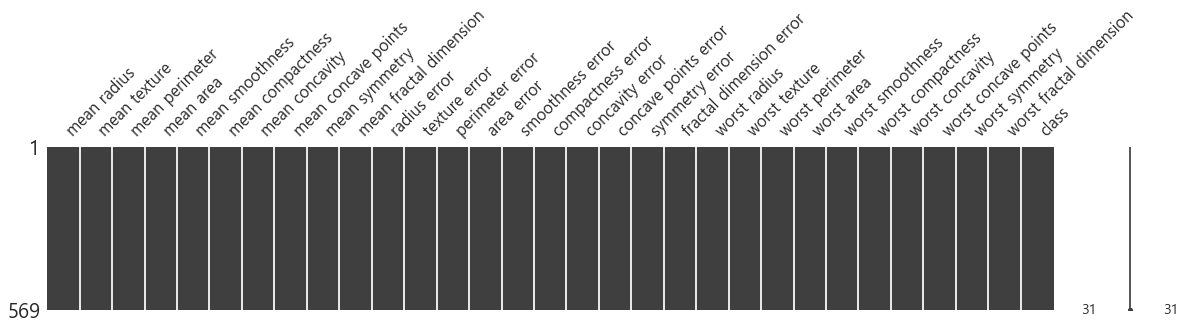

In [16]:
import missingno as msno 
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
msno.matrix(df, figsize=(20,3))

In [17]:
df.dropna(inplace=True)

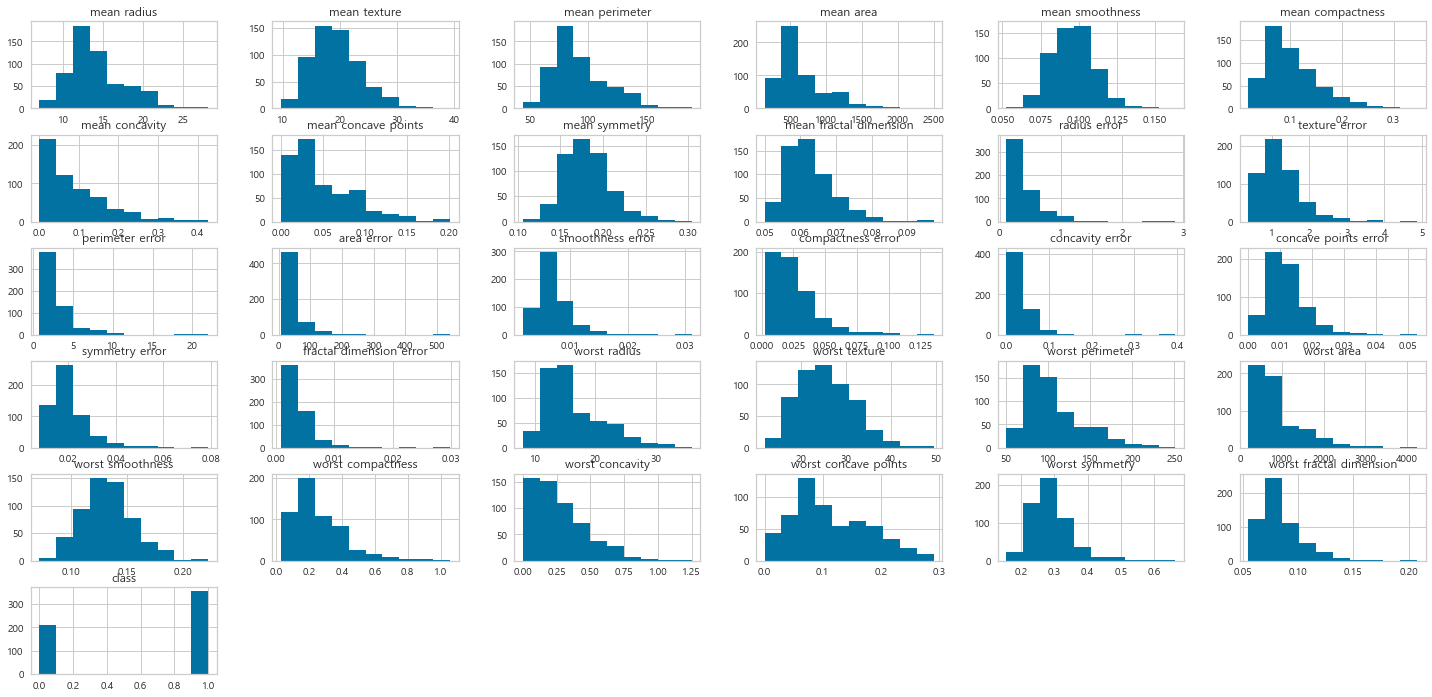

In [18]:
ax = df.hist(figsize=(25,12))

In [19]:
clf2 = setup(data = df, 
             target = 'class',
             normalize = True,
             train_size = 0.8,
             #high_cardinality_features = ['체지방율'],
             silent = True)

,Description,Value
0,session_id,3811
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
ensemble = models(type ='ensemble').index.tolist()
ensemble

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [21]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [22]:
ensembled_models = compare_models(include = ['rf', 'ada', 'gbc', 'et'], fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9560,0.9944,0.9789,0.9535,0.9654,0.9048,0.9078,0.0633
ada,Ada Boost Classifier,0.9494,0.9872,0.9687,0.9527,0.9600,0.8912,0.8935,0.0367
rf,Random Forest Classifier,0.9385,0.9889,0.9476,0.9558,0.9509,0.8684,0.8712,0.0700
gbc,Gradient Boosting Classifier,0.9341,0.9678,0.9476,0.9490,0.9476,0.8584,0.8607,0.0667


In [23]:
adb = create_model('rf', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9276,0.9921,0.9271,0.9570,0.9418,0.8462,0.8470
1,0.9474,0.9929,0.9263,0.9888,0.9565,0.8900,0.8931
2,0.9404,0.9818,0.9895,0.9216,0.9543,0.8689,0.8735
Mean,0.9385,0.9889,0.9476,0.9558,0.9509,0.8684,0.8712
SD,0.0082,0.0051,0.0296,0.0274,0.0065,0.0179,0.0189


In [24]:
tunes_adb = tune_model(adb, fold = 3)
tunes_adb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9868,0.9970,0.9896,0.9896,0.9896,0.9717,0.9717
1,0.9408,0.9930,0.9263,0.9778,0.9514,0.8759,0.8780
2,0.9470,0.9882,0.9895,0.9307,0.9592,0.8839,0.8873
Mean,0.9582,0.9927,0.9685,0.9660,0.9667,0.9105,0.9123
SD,0.0204,0.0036,0.0298,0.0254,0.0165,0.0434,0.0422


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=290,
                       n_jobs=-1, oob_score=False, random_state=3811, verbose=0,
                       warm_start=False)

## SHAP value

- 모델안의 변수의 중요도이외 SHAP 지표

 * SHAP(Shapley Additive exPlanations) https://www.coursera.org/lecture/negotiation/the-shapley-value-solving-the-runway-problem-3A3er
 * SHAP값은 특정 변수의 예측결과에 대한 상대적 공헌도다. 
    * A와 B가 집까지 택시요금이 각각 6,000원과 11,000원이라고 하자. 두 사람이 같이 택시를 타고 가면 총 12,000원인데 A와 B는 각각 얼마를 내야 하지? 
       * 택시를 같이 타면 절약되는 5,000원을 분배율 50%로 정한다.
       * A는 6,000원에서 2,500원을 뺀 3,500원을, B는 11,000원에서 2,500원을 뺀 8,500원을 각자 부담한다면 협조적 게임의 균형이 이루어져 A와 B는 모두 만족하게 된다.


https://github.com/slundberg/shap

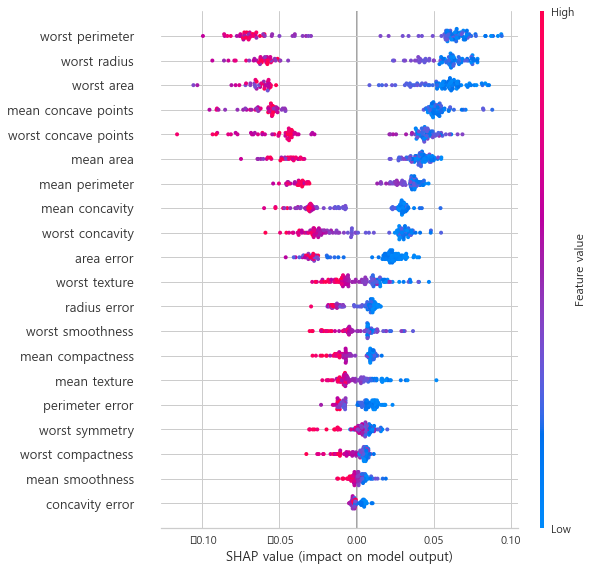

In [25]:
interpret_model(tunes_adb)

In [26]:
pred_holdout = predict_model(tunes_adb)
pred_holdout.shape
pred_holdout

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9561,0.9843,0.9859,0.9459,0.9655,0.9053,0.9068


(114, 32)

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class,Label,Score
0,1.174235,-0.722578,-0.669197,-1.582127,-0.879602,-0.851386,-0.913017,0.450595,-0.588828,-0.546038,...,-0.704765,-1.685607,-0.727598,-0.928993,-0.998785,0.555859,-0.916152,1,1,0.9957
1,0.213216,-0.888320,-0.889809,-0.414164,1.157496,1.705542,0.261298,1.352011,3.160687,-1.037010,...,-0.920019,-0.829507,0.667799,1.534392,0.479429,-0.472693,1.948951,1,1,0.6910
2,1.027944,-0.378909,-0.440477,1.154077,0.414493,0.291165,0.497784,0.343708,0.449140,0.066536,...,0.006645,2.385975,0.940946,0.603096,0.856685,0.776830,1.027538,0,0,0.9489
3,-0.907597,0.152438,-0.012955,1.227120,0.558240,0.129838,0.546249,1.095482,0.093432,0.368781,...,-0.139679,-0.220927,0.340270,-0.056147,0.377224,0.408015,0.025979,1,1,0.5174
4,0.951423,1.506400,1.393759,0.460165,0.967078,1.421930,1.008565,0.603800,-0.410974,0.413766,...,0.920007,0.623818,0.265495,0.340328,0.628227,0.040788,-0.442361,0,0,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.392203,-1.121495,-0.966702,0.314078,-0.573813,-0.785455,-0.795788,0.290264,0.071564,-0.508433,...,-0.864564,0.346778,-0.702261,-0.775278,-0.745678,-0.000545,-0.415100,1,1,0.9992
110,0.688099,-0.274508,-0.428734,0.905729,1.416987,0.987304,0.494739,1.120422,1.417133,-0.353093,...,-0.308289,2.049893,1.733195,1.651385,1.248971,0.814984,2.183393,0,0,0.8446
111,0.541808,1.538897,1.502806,0.114670,0.558240,1.193567,1.552586,0.974342,-0.826453,0.759239,...,1.132497,-0.488884,0.568305,0.932718,1.666809,1.829229,-0.276616,0,0,1.0000
112,-0.524990,0.116690,0.048000,-0.522998,-0.620858,-0.682938,-0.516165,-0.839179,-0.843947,-0.364691,...,-0.184769,-0.488884,-0.610800,-0.698676,-0.524434,-0.587154,-0.871445,1,1,0.9604


# Model Interpretability

In [27]:
from sklearn.datasets import load_wine
data  = load_wine()
df = pd.DataFrame(data.data, columns = data['feature_names'])
df['target'] = data.target

df[100::2].loc[df['target'] == 2, 'target']  = 0
df[101::2].loc[df['target'] == 2, 'target']  = 1

X = df[data['feature_names']]
y = df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 1. Model based 특성변수 중요도

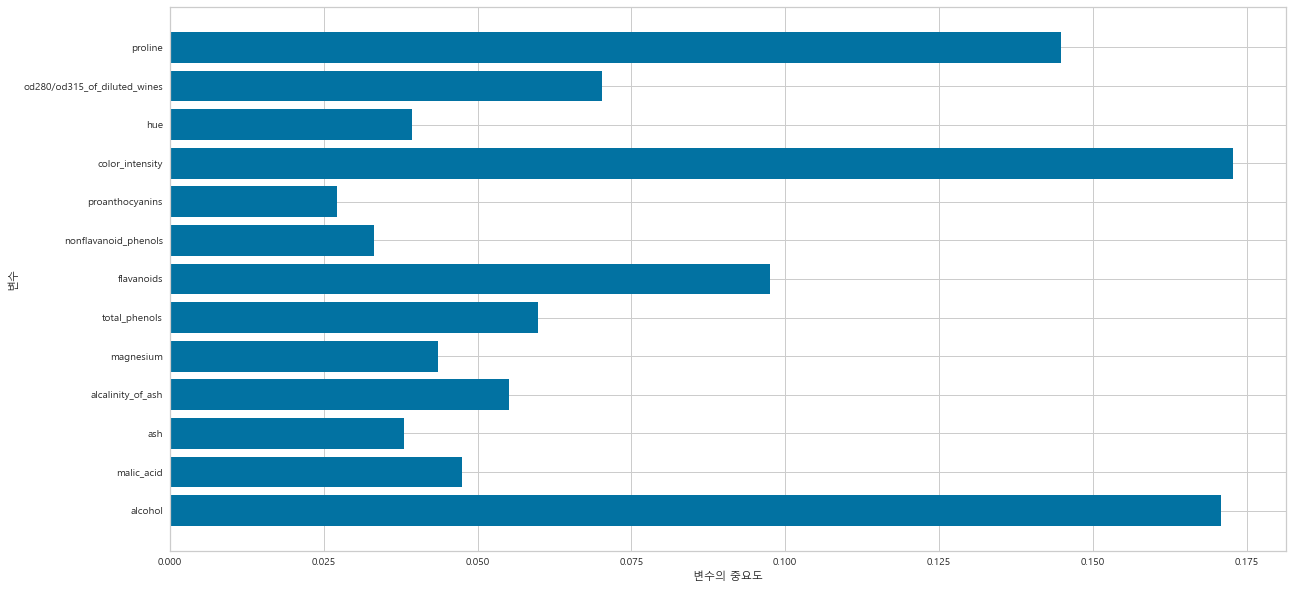

In [30]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
def plot_feature_importances(model):
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.barh(range(X_train.shape[1]), rf.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
    plt.xlabel('변수의 중요도'); plt.ylabel('변수')
    # plt.savefig('../output/Feature_importance') # 그림 파일 저장
    
plot_feature_importances(rf)

## 2. Permutations based 특성변수 중요도

In [31]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=0)
result.importances_mean.round(3)
np.argsort(-result.importances_mean)
X_train.columns

array([0.013, 0.001, 0.003, 0.   , 0.001, 0.   , 0.005, 0.   , 0.   ,
       0.046, 0.004, 0.003, 0.015])

array([ 9, 12,  0,  6, 10,  2, 11,  1,  4,  3,  5,  7,  8], dtype=int64)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

<AxesSubplot:xlabel='0'>

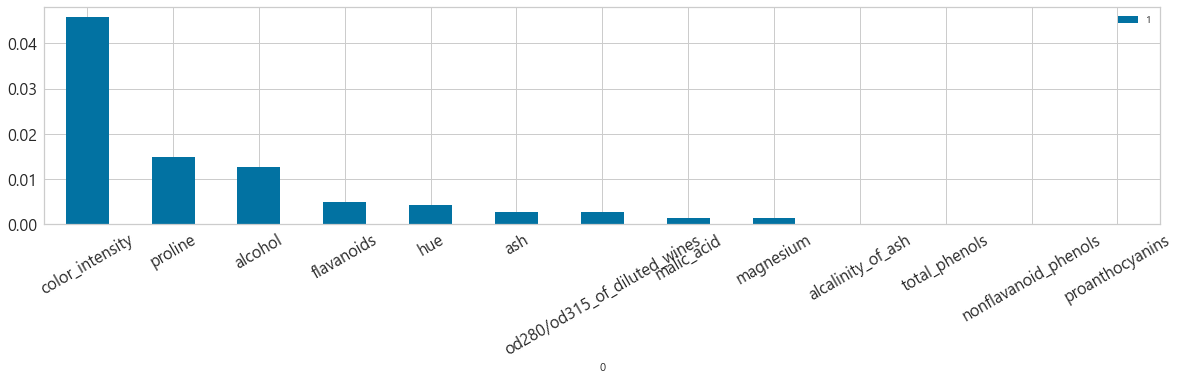

In [32]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
data = pd.DataFrame(list(zip(X_train.columns, result.importances_mean)))
data.sort_values(by =1, ascending= False, inplace =True)
data.plot(kind='bar', x=0, y=1, rot='30', figsize=(20, 4), fontsize=16)

## 3. 특성변수 영향도(partial dependence)

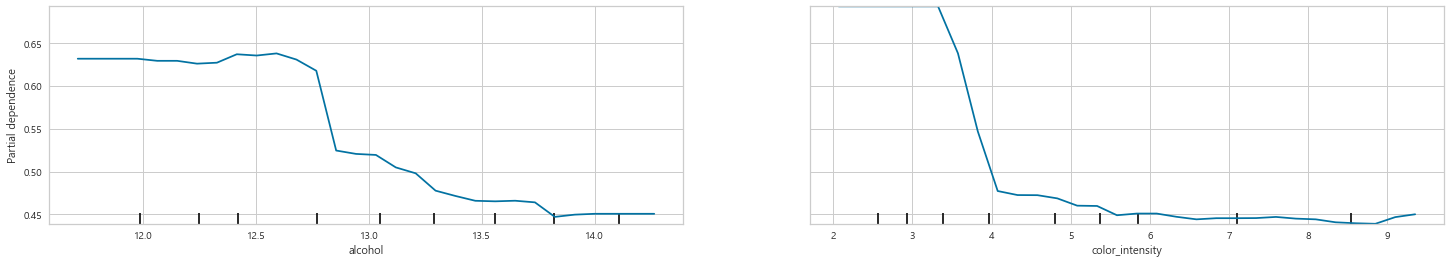

In [33]:
from sklearn.inspection import plot_partial_dependence
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['figure.figsize'] = (25,4)
features = ['alcohol', 'color_intensity']
plot_partial_dependence(rf, X_train, features, n_jobs=3, grid_resolution=30)
fig = plt.gcf(); fig.subplots_adjust(hspace=2)

# End